In [32]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
sb.set(color_codes = True)

## Data Exploration

In [56]:
impact_df = pd.read_csv("C:/Users/Jaswinder Singh/Downloads/DMML/Data/Asteorid Impact Prediction/impacts.csv")
orbits_df = pd.read_csv("C:/Users/Jaswinder Singh/Downloads/DMML/Data/Asteorid Impact Prediction/orbits.csv")

In [57]:
impact_df.head()

,Object Name,Period Start,Period End,Possible Impacts,Cumulative Impact Probability,Asteroid Velocity,Asteroid Magnitude,Asteroid Diameter (km),Cumulative Palermo Scale,Maximum Palermo Scale,Maximum Torino Scale
0,2006 WP1,2017,2017,1,5.200000e-09,17.77,28.3,0.007,-8.31,-8.31,0
1,2013 YB,2017,2046,23,7.600000e-05,8.98,31.4,0.002,-6.60,-6.96,0
2,2008 US,2017,2062,30,1.600000e-05,18.33,31.4,0.002,-6.48,-6.87,0
3,2010 VR139,2017,2076,24,2.000000e-07,4.99,26.7,0.016,-6.83,-6.95,0
4,2015 ME131,2017,2096,85,2.300000e-08,19.46,19.2,0.497,-3.85,-4.30,0


In [5]:
orbits_df.head()

,Object Name,Object Classification,Epoch (TDB),Orbit Axis (AU),Orbit Eccentricity,Orbit Inclination (deg),Perihelion Argument (deg),Node Longitude (deg),Mean Anomoly (deg),Perihelion Distance (AU),Aphelion Distance (AU),Orbital Period (yr),Minimum Orbit Intersection Distance (AU),Orbital Reference,Asteroid Magnitude
0,433 Eros,Amor Asteroid,57800,1.4579,0.2226,10.8277,178.8050,304.3265,319.3111,1.1335,1.78,1.76,0.1492,598,11.16
1,719 Albert,Amor Asteroid,57800,2.6385,0.5479,11.5822,156.1409,183.9204,224.5535,1.1928,4.08,4.29,0.2004,78,15.50
2,887 Alinda,Amor Asteroid,57800,2.4787,0.5671,9.3561,350.3482,110.5444,351.3730,1.0731,3.88,3.90,0.0925,188,13.40
3,1036 Ganymed,Amor Asteroid,57800,2.6628,0.5338,26.6929,132.4690,215.5551,92.5640,1.2413,4.08,4.35,0.3421,597,9.45
4,1221 Amor,Amor Asteroid,57800,1.9191,0.4356,11.8795,26.6572,171.3448,313.7379,1.0832,2.76,2.66,0.1068,70,17.70


In [6]:
impact_df.columns
impact_df.shape

(683, 11)

In [7]:
orbits_df.columns
orbits_df.shape

(15635, 15)

In [8]:
impact_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Object Name                    683 non-null    object 
 1   Period Start                   683 non-null    int64  
 2   Period End                     683 non-null    int64  
 3   Possible Impacts               683 non-null    int64  
 4   Cumulative Impact Probability  683 non-null    float64
 5   Asteroid Velocity              683 non-null    float64
 6   Asteroid Magnitude             683 non-null    float64
 7   Asteroid Diameter (km)         683 non-null    float64
 8   Cumulative Palermo Scale       683 non-null    float64
 9   Maximum Palermo Scale          683 non-null    float64
 10  Maximum Torino Scale           683 non-null    object 
dtypes: float64(6), int64(3), object(2)
memory usage: 58.8+ KB


In [9]:
orbits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15635 entries, 0 to 15634
Data columns (total 15 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Object Name                               15635 non-null  object 
 1   Object Classification                     15635 non-null  object 
 2   Epoch (TDB)                               15635 non-null  int64  
 3   Orbit Axis (AU)                           15635 non-null  float64
 4   Orbit Eccentricity                        15635 non-null  float64
 5   Orbit Inclination (deg)                   15635 non-null  float64
 6   Perihelion Argument (deg)                 15635 non-null  float64
 7   Node Longitude (deg)                      15635 non-null  float64
 8   Mean Anomoly (deg)                        15635 non-null  float64
 9   Perihelion Distance (AU)                  15635 non-null  float64
 10  Aphelion Distance (AU)            

In [10]:
impact_df.describe()

,Period Start,Period End,Possible Impacts,Cumulative Impact Probability,Asteroid Velocity,Asteroid Magnitude,Asteroid Diameter (km),Cumulative Palermo Scale,Maximum Palermo Scale
count,683.000000,683.000000,683.000000,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000
mean,2062.573939,2099.680820,43.348463,1.539476e-04,11.462577,26.158272,0.049378,-6.511552,-6.804012
std,43.501694,37.594698,113.773280,2.519607e-03,6.067772,2.388296,0.156403,1.509189,1.476135
min,2017.000000,2017.000000,1.000000,1.100000e-10,0.340000,15.600000,0.002000,-10.980000,-11.000000
25%,2034.000000,2090.000000,2.000000,1.100000e-07,7.240000,25.000000,0.010000,-7.490000,-7.790000
50%,2061.000000,2109.000000,6.000000,1.700000e-06,10.500000,26.400000,0.017000,-6.460000,-6.790000
75%,2085.000000,2114.000000,29.000000,1.550000e-05,14.810000,27.800000,0.033000,-5.490000,-5.865000
max,2880.000000,2880.000000,1144.000000,6.500000e-02,39.470000,31.600000,2.579000,-1.420000,-1.420000


In [11]:
orbits_df.describe()

,Epoch (TDB),Orbit Axis (AU),Orbit Eccentricity,Orbit Inclination (deg),Perihelion Argument (deg),Node Longitude (deg),Mean Anomoly (deg),Perihelion Distance (AU),Aphelion Distance (AU),Orbital Period (yr),Minimum Orbit Intersection Distance (AU),Orbital Reference,Asteroid Magnitude
count,15635.000000,15635.000000,15635.000000,15635.000000,15635.00000,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000,15634.000000
mean,57365.394947,1.781002,0.449694,12.941175,181.50956,172.672154,172.834863,0.914912,2.647087,2.473406,0.101884,21.885257,22.286336
std,1167.238040,0.603229,0.176000,11.303231,103.86248,103.384143,116.123065,0.240309,1.142659,1.517588,0.105937,33.632091,3.016002
min,44221.000000,0.547600,0.004400,0.014700,0.00810,0.007000,0.003100,0.070700,0.800000,0.410000,0.000000,1.000000,9.450000
25%,57800.000000,1.323600,0.322700,4.762450,92.43535,82.241950,62.040250,0.776750,1.740000,1.520000,0.018700,6.000000,19.900000
50%,57800.000000,1.735500,0.462900,9.197400,183.31780,172.173400,167.750200,0.965800,2.520000,2.290000,0.062000,11.000000,22.200000
75%,57800.000000,2.208650,0.572900,18.510900,270.91745,253.660050,281.443100,1.080300,3.420000,3.280000,0.159150,23.000000,24.600000
max,57800.000000,21.395400,0.969500,154.375100,359.99420,359.998100,359.998200,1.300000,41.540000,98.970000,0.706900,635.000000,33.200000


In [12]:
# Checking rows for duplicate data
duplicate_rows_df = orbits_df[orbits_df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 15)


In [13]:
orbits_df.count()  # counting the no. of rows before removing

Object Name                                 15635
Object Classification                       15635
Epoch (TDB)                                 15635
Orbit Axis (AU)                             15635
Orbit Eccentricity                          15635
Orbit Inclination (deg)                     15635
Perihelion Argument (deg)                   15635
Node Longitude (deg)                        15635
Mean Anomoly (deg)                          15635
Perihelion Distance (AU)                    15635
Aphelion Distance (AU)                      15635
Orbital Period (yr)                         15635
Minimum Orbit Intersection Distance (AU)    15635
Orbital Reference                           15635
Asteroid Magnitude                          15634
dtype: int64

In [14]:
orbits_df = orbits_df.drop_duplicates()
orbits_df.head()

,Object Name,Object Classification,Epoch (TDB),Orbit Axis (AU),Orbit Eccentricity,Orbit Inclination (deg),Perihelion Argument (deg),Node Longitude (deg),Mean Anomoly (deg),Perihelion Distance (AU),Aphelion Distance (AU),Orbital Period (yr),Minimum Orbit Intersection Distance (AU),Orbital Reference,Asteroid Magnitude
0,433 Eros,Amor Asteroid,57800,1.4579,0.2226,10.8277,178.8050,304.3265,319.3111,1.1335,1.78,1.76,0.1492,598,11.16
1,719 Albert,Amor Asteroid,57800,2.6385,0.5479,11.5822,156.1409,183.9204,224.5535,1.1928,4.08,4.29,0.2004,78,15.50
2,887 Alinda,Amor Asteroid,57800,2.4787,0.5671,9.3561,350.3482,110.5444,351.3730,1.0731,3.88,3.90,0.0925,188,13.40
3,1036 Ganymed,Amor Asteroid,57800,2.6628,0.5338,26.6929,132.4690,215.5551,92.5640,1.2413,4.08,4.35,0.3421,597,9.45
4,1221 Amor,Amor Asteroid,57800,1.9191,0.4356,11.8795,26.6572,171.3448,313.7379,1.0832,2.76,2.66,0.1068,70,17.70


In [15]:
data_io = pd.concat([impact_df,orbits_df], axis = 1, sort = False)
# Rearranging the columns in the merged data frame
data_io.columns = ['Object_Name', 'Period_Start', 'Period_End', 'Possible_Impacts',
       'Cumulative_Impact_Probability', 'Asteroid_Velocity',
       'Asteroid_Magnitude', 'Asteroid_Diameter(km)',
       'Cumulative_Palermo_Scale', 'Maximum_Palermo_Scale',
       'Maximum_Torino_Scale', 'Object_Name', 'Object_Classification',
       'Epoch(TDB)', 'Orbit_Axis(AU)', 'Orbit_Eccentricity',
       'Orbit_Inclination(deg)', 'Perihelion_Argument(deg)',
       'Node_Longitude(deg)', 'Mean_Anomoly(deg)',
       'Perihelion_Distance(AU)', 'Aphelion_Distance(AU)',
       'Orbital_Period(yr)', 'Minimum_Orbit_Intersection_Distance(AU)',
       'Orbital_Reference', 'Asteroid_Magnitude']
data_io.columns

Index(['Object_Name', 'Period_Start', 'Period_End', 'Possible_Impacts',
       'Cumulative_Impact_Probability', 'Asteroid_Velocity',
       'Asteroid_Magnitude', 'Asteroid_Diameter(km)',
       'Cumulative_Palermo_Scale', 'Maximum_Palermo_Scale',
       'Maximum_Torino_Scale', 'Object_Name', 'Object_Classification',
       'Epoch(TDB)', 'Orbit_Axis(AU)', 'Orbit_Eccentricity',
       'Orbit_Inclination(deg)', 'Perihelion_Argument(deg)',
       'Node_Longitude(deg)', 'Mean_Anomoly(deg)', 'Perihelion_Distance(AU)',
       'Aphelion_Distance(AU)', 'Orbital_Period(yr)',
       'Minimum_Orbit_Intersection_Distance(AU)', 'Orbital_Reference',
       'Asteroid_Magnitude'],
      dtype='object')

In [16]:
#Exploring the impacts file
impact_df.head()
# impact_df['Period Start'].value_counts(dropna = False)

,Object Name,Period Start,Period End,Possible Impacts,Cumulative Impact Probability,Asteroid Velocity,Asteroid Magnitude,Asteroid Diameter (km),Cumulative Palermo Scale,Maximum Palermo Scale,Maximum Torino Scale
0,2006 WP1,2017,2017,1,5.200000e-09,17.77,28.3,0.007,-8.31,-8.31,0
1,2013 YB,2017,2046,23,7.600000e-05,8.98,31.4,0.002,-6.60,-6.96,0
2,2008 US,2017,2062,30,1.600000e-05,18.33,31.4,0.002,-6.48,-6.87,0
3,2010 VR139,2017,2076,24,2.000000e-07,4.99,26.7,0.016,-6.83,-6.95,0
4,2015 ME131,2017,2096,85,2.300000e-08,19.46,19.2,0.497,-3.85,-4.30,0


In [17]:
impact_df['Period End'].value_counts()

2115    95
2114    78
2113    44
2111    32
2112    29
        ..
2017     1
2880     1
2199     1
2198     1
2048     1
Name: Period End, Length: 93, dtype: int64

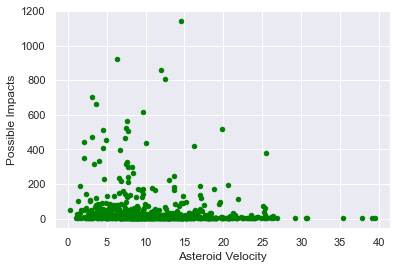

In [18]:
#Plotting the Asteroid velocity vs Possible Impact
impact_df.plot(kind='scatter',x='Asteroid Velocity',y='Possible Impacts',color='green')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Asteroid Magnitude', ylabel='Possible Impacts'>

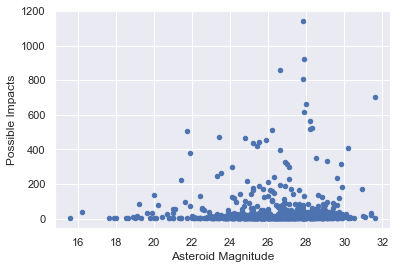

In [19]:
impact_df.plot(x='Asteroid Magnitude', y = 'Possible Impacts', kind = 'scatter')

In [20]:
impact_df['Object Name'].head(100).unique()

array(['2006 WP1', '2013 YB', '2008 US', '2010 VR139', '2015 ME131',
       '2010 XB73', '2005 TM173', '2006 SF281', '2010 VP139',
       '2014 HR197', '2015 HV182', '2008 SH148', '2008 XK', '2010 XC',
       '2010 MY112', '2014 MO68', '2009 FZ4', '2008 VS4', '2009 VZ39',
       '2014 JT79', '2008 VL', '2010 WW8', '2008 EM68', '2015 HW182',
       '2012 BP123', '2008 EK68', '2005 ED224', '2014 MV67', '2016 JT38',
       '2008 JD33', '2005 NX55', '2008 UY91', '2014 OY391', '2010 JA43',
       '2015 HS182', '2011 CF66', '2016 AZ193', '2016 JO38', '2014 HD198',
       '2006 QV89', '2008 VB4', '2008 UV99', '2010 DJ77', '2014 ML67',
       '2004 ME6', '2007 FT3', '2014 MA68', '2016 RP41', '2012 BL14',
       '2014 HN198', '2016 NL56', '2001 YN2', '2001 UO', '2008 VM',
       '2001 CA21', '2016 JP38', '2008 YD3', '2010 UJ', '2010 AU118',
       '2009 TB', '2016 WN55', '2012 BK14', '2012 TC4', '2007 YM',
       '2015 HQ182', '2016 PO66', '2010 XN69', '2015 YV20', '2010 LJ68',
       '2015 HO1

In [26]:
list_of_ast = list(impact_df['Object Name'].head(100).unique())
Period_Start_ratio = [] 
for x in list_of_ast:
    y = impact_df[impact_df['Object Name'] == x]
    Period_Start_rate = sum(y['Period Start'])/len(y)
    Period_Start_ratio.append(Period_Start_rate)

asteroids_list_df = pd.DataFrame({'Object_list': list_of_ast,'Period_Start_ratio':Period_Start_ratio})
new_index = (asteroids_list_df['Period_Start_ratio'].sort_values(ascending=False)).index.values
sorted_ast_df = asteroids_list_df.reindex(new_index)

In [27]:
asteroids_list_df.head()

,Object_list,Period_Start_ratio
0,2006 WP1,2017.0
1,2013 YB,2017.0
2,2008 US,2017.0
3,2010 VR139,2017.0
4,2015 ME131,2017.0


In [28]:
new_index

array([99, 92, 98, 87, 88, 89, 91, 90, 93, 94, 95, 96, 97, 79, 74, 75, 76,
       77, 78, 81, 80, 82, 83, 84, 85, 86, 55, 59, 58, 57, 56, 52, 54, 53,
       61, 51, 60, 72, 62, 68, 73, 71, 63, 69, 70, 67, 66, 65, 64, 44, 39,
       40, 41, 42, 43, 49, 45, 47, 48, 50, 46, 32, 26, 27, 29, 30, 31, 28,
       33, 35, 36, 37, 34, 38,  6, 10,  9,  8,  7,  4,  5,  3,  2,  1, 12,
       11, 21, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25,  0],
      dtype=int64)

In [30]:
sorted_ast_df.head(10)

,Object_list,Period_Start_ratio
99,2014 HJ198,2022.0
92,2009 FG,2022.0
98,2006 GU2,2022.0
87,2009 JF1,2022.0
88,2010 CA,2022.0
89,2014 NJ65,2022.0
91,2015 BS516,2022.0
90,2007 SN6,2022.0
93,2011 KF36,2022.0
94,2003 UM3,2022.0


Visualizing the Asteroid and their periods

Text(0.5, 1.0, 'Period Start for different Asteroids')

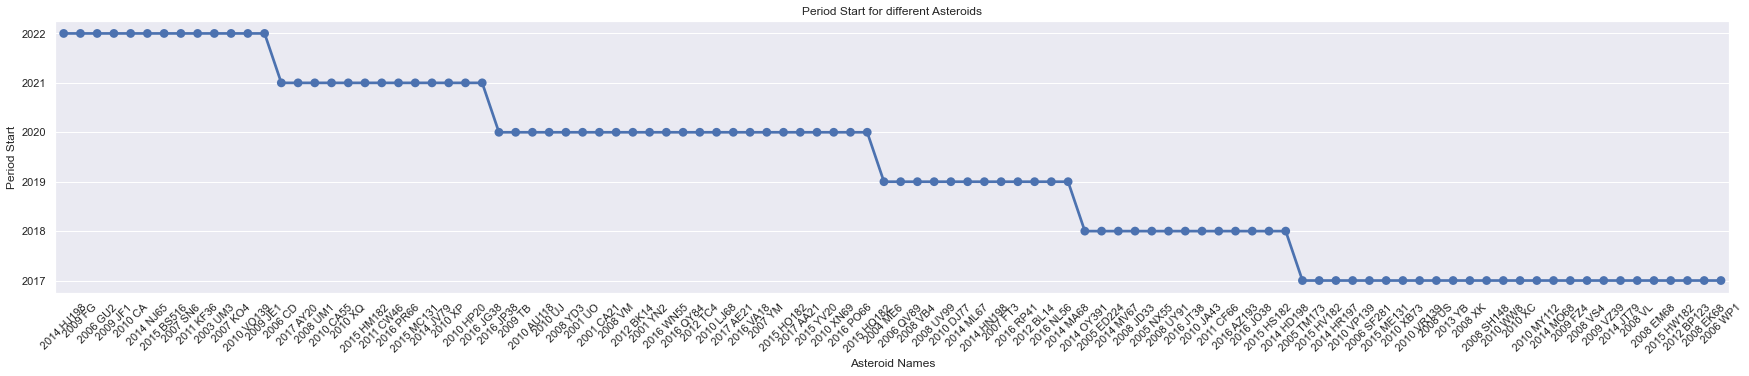

In [43]:
#Period Start plot for objects
plt.figure(figsize=(30,5))
sb.pointplot(x=sorted_ast_df['Object_list'], y=sorted_ast_df['Period_Start_ratio'])
plt.xticks(rotation= 45)
plt.xlabel('Asteroid Names')
plt.ylabel('Period Start')
plt.title('Period Start for different Asteroids')

In [34]:
orbits_df.head(10)

,Object Name,Object Classification,Epoch (TDB),Orbit Axis (AU),Orbit Eccentricity,Orbit Inclination (deg),Perihelion Argument (deg),Node Longitude (deg),Mean Anomoly (deg),Perihelion Distance (AU),Aphelion Distance (AU),Orbital Period (yr),Minimum Orbit Intersection Distance (AU),Orbital Reference,Asteroid Magnitude
0,433 Eros,Amor Asteroid,57800,1.4579,0.2226,10.8277,178.8050,304.3265,319.3111,1.1335,1.78,1.76,0.1492,598,11.16
1,719 Albert,Amor Asteroid,57800,2.6385,0.5479,11.5822,156.1409,183.9204,224.5535,1.1928,4.08,4.29,0.2004,78,15.50
2,887 Alinda,Amor Asteroid,57800,2.4787,0.5671,9.3561,350.3482,110.5444,351.3730,1.0731,3.88,3.90,0.0925,188,13.40
3,1036 Ganymed,Amor Asteroid,57800,2.6628,0.5338,26.6929,132.4690,215.5551,92.5640,1.2413,4.08,4.35,0.3421,597,9.45
4,1221 Amor,Amor Asteroid,57800,1.9191,0.4356,11.8795,26.6572,171.3448,313.7379,1.0832,2.76,2.66,0.1068,70,17.70
5,1566 Icarus,Apollo Asteroid (Hazard),57800,1.0781,0.8269,22.8255,31.3830,88.0107,215.5288,0.1867,1.97,1.12,0.0345,100,16.90
6,1580 Betulia,Amor Asteroid,57800,2.1973,0.4875,52.0908,159.4852,62.2921,191.9105,1.1260,3.27,3.26,0.1361,191,14.80
7,1620 Geographos,Apollo Asteroid (Hazard),57800,1.2453,0.3353,13.3375,276.8930,337.2080,104.1556,0.8277,1.66,1.39,0.0307,449,15.60
8,1627 Ivar,Amor Asteroid,57800,1.8628,0.3966,8.4512,167.7730,133.1445,151.4603,1.1241,2.60,2.54,0.1124,635,13.20
9,1685 Toro,Apollo Asteroid,54520,1.3673,0.4359,9.3807,127.0826,274.3396,48.6229,0.7713,1.96,1.60,0.0504,355,14.23


In [37]:
#Period End plot for objects
Period_End_ratio = [] 
for x in list_of_ast:
    y = impact_df[impact_df['Object Name'] == x]
    Period_End_rate = sum(y['Period End'])/len(y)
    Period_End_ratio.append(Period_End_rate)

asteroids_list_df2 = pd.DataFrame({'Object_list': list_of_ast,'Period_End_ratio':Period_End_ratio})
new_index2 = (asteroids_list_df2['Period_End_ratio'].sort_values(ascending=False)).index.values
sorted_ast_df2 = asteroids_list_df2.reindex(new_index)

Text(0.5, 1.0, 'Period End for different Asteroids')

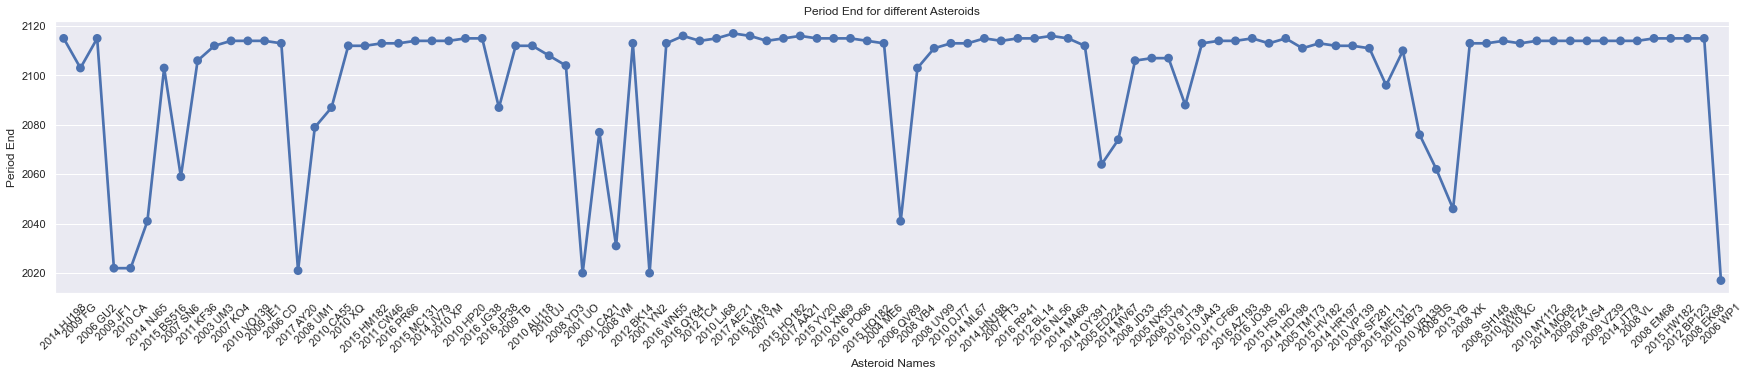

In [42]:
plt.figure(figsize=(30,5))
sb.pointplot(x=sorted_ast_df2['Object_list'], y=sorted_ast_df2['Period_End_ratio'])
plt.xticks(rotation= 45)
plt.xlabel('Asteroid Names')
plt.ylabel('Period End')
plt.title('Period End for different Asteroids')

Exploring the relation between Asteroid velocity, magnitude and cumulative impact probability( from impacts dataframe)

In [59]:
Cumulative_impact_probability = []
Asteroid_velocity = []
Asteroid_magnitude = []
# Asteroid_Diameter = []
Possible_impacts = []
for i in list_of_ast:
    x = impact_df[impact_df['Object Name'] == i]
    Cumulative_Impact_Probability.append(sum(x['Cumulative Impact Probability'])/len(x))
    Asteroid_velocity.append(sum(x['Asteroid Velocity']) / len(x))
    Asteroid_magnitude.append(sum(x['Asteroid Magnitude']) / len(x))
#     Asteroid_Diameter.append(sum(x.Asteroid_Diameter) / len(x))
    Possible_impacts.append(sum(x['Possible Impacts']) / len(x))

In [58]:
# impact_df = impact_df.iloc[1:]
impact_df.head(10)

,Object Name,Period Start,Period End,Possible Impacts,Cumulative Impact Probability,Asteroid Velocity,Asteroid Magnitude,Asteroid Diameter (km),Cumulative Palermo Scale,Maximum Palermo Scale,Maximum Torino Scale
0,2006 WP1,2017,2017,1,5.200000e-09,17.77,28.3,0.007,-8.31,-8.31,0
1,2013 YB,2017,2046,23,7.600000e-05,8.98,31.4,0.002,-6.60,-6.96,0
2,2008 US,2017,2062,30,1.600000e-05,18.33,31.4,0.002,-6.48,-6.87,0
3,2010 VR139,2017,2076,24,2.000000e-07,4.99,26.7,0.016,-6.83,-6.95,0
4,2015 ME131,2017,2096,85,2.300000e-08,19.46,19.2,0.497,-3.85,-4.30,0
5,2010 XB73,2017,2110,55,2.800000e-07,5.98,22.5,0.110,-5.03,-5.51,0
6,2005 TM173,2017,2111,123,9.000000e-07,8.79,24.1,0.052,-5.41,-6.42,0
7,2006 SF281,2017,2111,514,1.900000e-06,4.49,26.2,0.020,-5.91,-7.58,0
8,2010 VP139,2017,2112,350,1.800000e-05,2.04,28.5,0.007,-6.51,-7.54,0
9,2014 HR197,2017,2112,187,7.900000e-08,17.02,26.9,0.014,-7.18,-7.97,0


[Text(0.5, 0, 'Percentage of Asteroids'),
 Text(0, 0.5, 'Asteroids'),
 Text(0.5, 1.0, 'Asteroid percentages by name')]

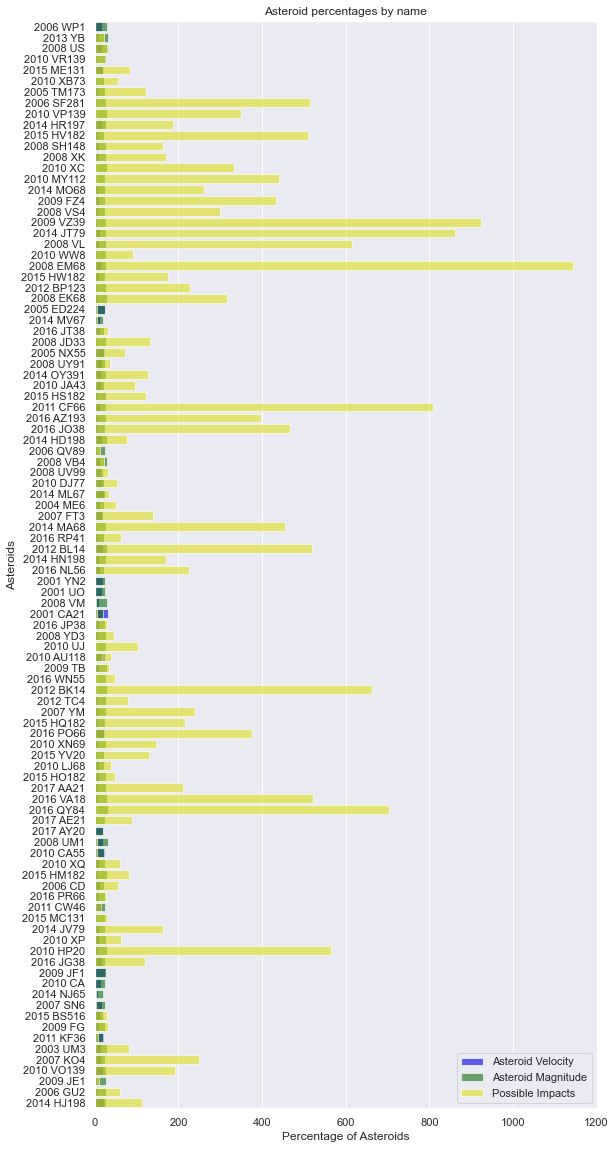

In [64]:
#PLotting the above parameters
f,ax = plt.subplots(figsize = (9,20))
# sb.barplot(x = Cumulative_impact_probability, y = list_of_ast, color = 'cyan', alpha = 0.5, label='Cumulative Impact Probability' )
sb.barplot(x = Asteroid_velocity, y = list_of_ast, color = 'blue', alpha = 0.7, label='Asteroid Velocity')
sb.barplot(x = Asteroid_magnitude, y = list_of_ast, color = 'green', alpha = 0.6, label='Asteroid Magnitude')
sb.barplot(x = Possible_impacts, y = list_of_ast, color = 'yellow', alpha = 0.6, label='Possible Impacts')
ax.legend(loc = 'lower right',frameon = True)
ax.set(xlabel = 'Percentage of Asteroids', ylabel = 'Asteroids', title = "Asteroid percentages by name")

Count of asteroids by categories

In [73]:
category = orbits_df['Object Classification'].unique()
category
objects = orbits_df['Object Classification'].value_counts()
objects

Apollo Asteroid              6940
Amor Asteroid                5918
Apollo Asteroid (Hazard)     1520
Aten Asteroid                 987
Aten Asteroid (Hazard)        155
Amor Asteroid (Hazard)         99
Apohele Asteroid               11
Apohele Asteroid (Hazard)       5
Name: Object Classification, dtype: int64

Text(0.5, 1.0, 'Asteroid numbers by category')

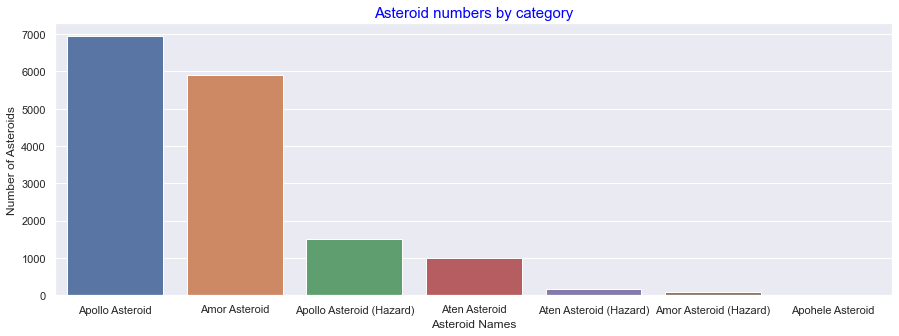

In [81]:
plt.figure(figsize=(15,5))
sb.barplot(x = objects[:7].index, y = objects[:7].values)
plt.ylabel('Number of Asteroids')
plt.xlabel('Asteroid Names')
plt.title('Asteroid numbers by category',color = 'blue',fontsize=15)

Correlation plots

In [82]:
impact_df.corr()

,Period Start,Period End,Possible Impacts,Cumulative Impact Probability,Asteroid Velocity,Asteroid Magnitude,Asteroid Diameter (km),Cumulative Palermo Scale,Maximum Palermo Scale
Period Start,1.000000,0.679122,-0.278767,0.032182,-0.004627,-0.058755,0.155077,-0.058681,0.006123
Period End,0.679122,1.000000,0.130901,0.024318,-0.155407,-0.067195,0.236800,0.195462,0.152466
Possible Impacts,-0.278767,0.130901,1.000000,0.007800,-0.136847,0.073852,-0.034076,0.168304,0.050068
Cumulative Impact Probability,0.032182,0.024318,0.007800,1.000000,-0.059637,0.047506,-0.013629,0.115400,0.126261
Asteroid Velocity,-0.004627,-0.155407,-0.136847,-0.059637,1.000000,-0.332128,0.174876,0.073115,0.114209
Asteroid Magnitude,-0.058755,-0.067195,0.073852,0.047506,-0.332128,1.000000,-0.612503,-0.390285,-0.410850
Asteroid Diameter (km),0.155077,0.236800,-0.034076,-0.013629,0.174876,-0.612503,1.000000,0.267590,0.278695
Cumulative Palermo Scale,-0.058681,0.195462,0.168304,0.115400,0.073115,-0.390285,0.267590,1.000000,0.978823
Maximum Palermo Scale,0.006123,0.152466,0.050068,0.126261,0.114209,-0.410850,0.278695,0.978823,1.000000


In [83]:
orbits_df.corr()

,Epoch (TDB),Orbit Axis (AU),Orbit Eccentricity,Orbit Inclination (deg),Perihelion Argument (deg),Node Longitude (deg),Mean Anomoly (deg),Perihelion Distance (AU),Aphelion Distance (AU),Orbital Period (yr),Minimum Orbit Intersection Distance (AU),Orbital Reference,Asteroid Magnitude
Epoch (TDB),1.000000,-0.013964,-0.074695,0.023537,-0.011761,0.024917,0.028729,0.067009,-0.028818,-0.006524,0.130585,0.141782,-0.204513
Orbit Axis (AU),-0.013964,1.000000,0.614002,-0.031493,-0.020269,-0.007345,-0.045389,0.358112,0.980526,0.935489,0.273780,0.029649,-0.251574
Orbit Eccentricity,-0.074695,0.614002,1.000000,-0.019005,-0.004882,-0.018802,-0.020973,-0.407528,0.733992,0.508229,0.007986,0.043129,-0.269128
Orbit Inclination (deg),0.023537,-0.031493,-0.019005,1.000000,0.010083,-0.009984,0.014380,-0.034539,-0.025977,-0.002910,0.434821,0.132036,-0.457201
Perihelion Argument (deg),-0.011761,-0.020269,-0.004882,0.010083,1.000000,-0.033469,-0.055162,-0.023820,-0.016380,-0.010289,-0.013749,-0.010936,0.020618
Node Longitude (deg),0.024917,-0.007345,-0.018802,-0.009984,-0.033469,1.000000,0.003812,0.012731,-0.010467,-0.004231,0.014811,0.029697,-0.018116
Mean Anomoly (deg),0.028729,-0.045389,-0.020973,0.014380,-0.055162,0.003812,1.000000,-0.027562,-0.042067,-0.040542,0.000831,0.022350,-0.044471
Perihelion Distance (AU),0.067009,0.358112,-0.407528,-0.034539,-0.023820,0.012731,-0.027562,1.000000,0.167789,0.276847,0.404220,0.009608,-0.026622
Aphelion Distance (AU),-0.028818,0.980526,0.733992,-0.025977,-0.016380,-0.010467,-0.042067,0.167789,1.000000,0.929507,0.204019,0.029254,-0.259996
Orbital Period (yr),-0.006524,0.935489,0.508229,-0.002910,-0.010289,-0.004231,-0.040542,0.276847,0.929507,1.000000,0.226133,0.024113,-0.209545


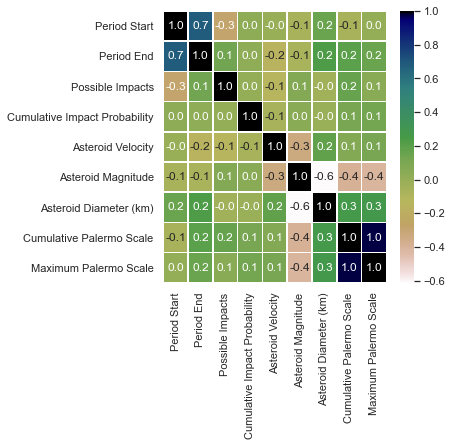

In [104]:
f,ax = plt.subplots(figsize=(5,5))
sb.heatmap(impact_df.corr(), annot = True, fmt='.1f', linewidths=.5, ax=ax, cmap = 'gist_earth_r')
plt.show()  

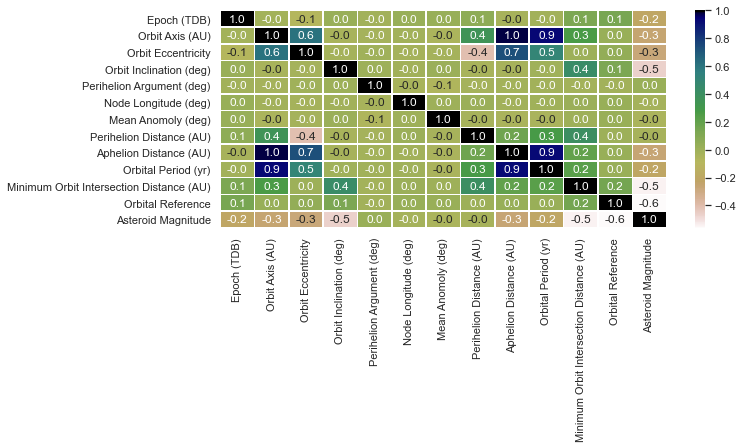

In [109]:
f,ax = plt.subplots(figsize=(10,4))
sb.heatmap(orbits_df.corr(), annot = True, fmt='.1f', linewidths=.5, ax=ax, cmap = 'gist_earth_r')
plt.show()  

In [110]:
merged_df = pd.concat([impact_df, orbits_df], axis = 1, sort = False)
merged_df.head(10)

,Object Name,Period Start,Period End,Possible Impacts,Cumulative Impact Probability,Asteroid Velocity,Asteroid Magnitude,Asteroid Diameter (km),Cumulative Palermo Scale,Maximum Palermo Scale,...,Orbit Inclination (deg),Perihelion Argument (deg),Node Longitude (deg),Mean Anomoly (deg),Perihelion Distance (AU),Aphelion Distance (AU),Orbital Period (yr),Minimum Orbit Intersection Distance (AU),Orbital Reference,Asteroid Magnitude
0,2006 WP1,2017.0,2017.0,1.0,5.200000e-09,17.77,28.3,0.007,-8.31,-8.31,...,10.8277,178.8050,304.3265,319.3111,1.1335,1.78,1.76,0.1492,598,11.16
1,2013 YB,2017.0,2046.0,23.0,7.600000e-05,8.98,31.4,0.002,-6.60,-6.96,...,11.5822,156.1409,183.9204,224.5535,1.1928,4.08,4.29,0.2004,78,15.50
2,2008 US,2017.0,2062.0,30.0,1.600000e-05,18.33,31.4,0.002,-6.48,-6.87,...,9.3561,350.3482,110.5444,351.3730,1.0731,3.88,3.90,0.0925,188,13.40
3,2010 VR139,2017.0,2076.0,24.0,2.000000e-07,4.99,26.7,0.016,-6.83,-6.95,...,26.6929,132.4690,215.5551,92.5640,1.2413,4.08,4.35,0.3421,597,9.45
4,2015 ME131,2017.0,2096.0,85.0,2.300000e-08,19.46,19.2,0.497,-3.85,-4.30,...,11.8795,26.6572,171.3448,313.7379,1.0832,2.76,2.66,0.1068,70,17.70
5,2010 XB73,2017.0,2110.0,55.0,2.800000e-07,5.98,22.5,0.110,-5.03,-5.51,...,22.8255,31.3830,88.0107,215.5288,0.1867,1.97,1.12,0.0345,100,16.90
6,2005 TM173,2017.0,2111.0,123.0,9.000000e-07,8.79,24.1,0.052,-5.41,-6.42,...,52.0908,159.4852,62.2921,191.9105,1.1260,3.27,3.26,0.1361,191,14.80
7,2006 SF281,2017.0,2111.0,514.0,1.900000e-06,4.49,26.2,0.020,-5.91,-7.58,...,13.3375,276.8930,337.2080,104.1556,0.8277,1.66,1.39,0.0307,449,15.60
8,2010 VP139,2017.0,2112.0,350.0,1.800000e-05,2.04,28.5,0.007,-6.51,-7.54,...,8.4512,167.7730,133.1445,151.4603,1.1241,2.60,2.54,0.1124,635,13.20
9,2014 HR197,2017.0,2112.0,187.0,7.900000e-08,17.02,26.9,0.014,-7.18,-7.97,...,9.3807,127.0826,274.3396,48.6229,0.7713,1.96,1.60,0.0504,355,14.23


In [112]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15635 entries, 0 to 15634
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Object Name                               683 non-null    object 
 1   Period Start                              683 non-null    float64
 2   Period End                                683 non-null    float64
 3   Possible Impacts                          683 non-null    float64
 4   Cumulative Impact Probability             683 non-null    float64
 5   Asteroid Velocity                         683 non-null    float64
 6   Asteroid Magnitude                        683 non-null    float64
 7   Asteroid Diameter (km)                    683 non-null    float64
 8   Cumulative Palermo Scale                  683 non-null    float64
 9   Maximum Palermo Scale                     683 non-null    float64
 10  Maximum Torino Scale              

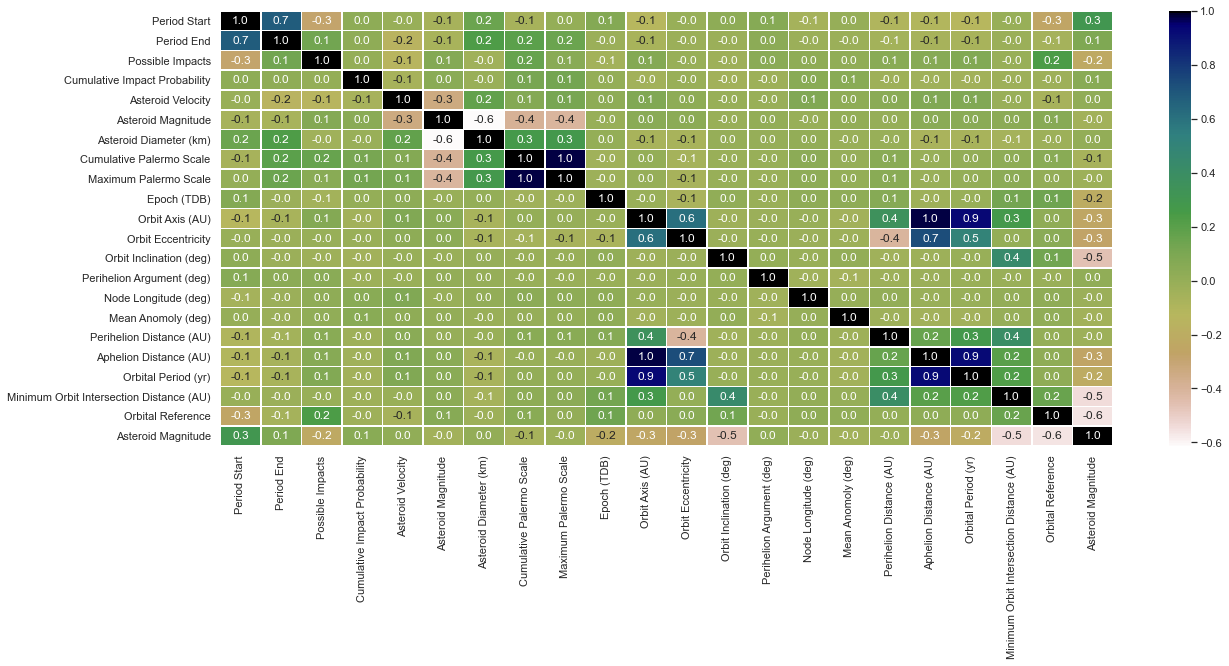

In [116]:
f,ax = plt.subplots(figsize=(20,8))
sb.heatmap(merged_df.corr(), annot = True, fmt='.1f', linewidths=.5, ax=ax, cmap = 'gist_earth_r')
plt.show()  

In [120]:
TorinoScale = impact_df['Maximum Torino Scale']
# Calculating the complete period of asteroid orbit
impact_df['Period'] = impact_df['Period End'] - impact_df['Period Start']
impact_df.head()

,Object Name,Period Start,Period End,Possible Impacts,Cumulative Impact Probability,Asteroid Velocity,Asteroid Magnitude,Asteroid Diameter (km),Cumulative Palermo Scale,Maximum Palermo Scale,Maximum Torino Scale,Period
0,2006 WP1,2017,2017,1,5.200000e-09,17.77,28.3,0.007,-8.31,-8.31,0,0
1,2013 YB,2017,2046,23,7.600000e-05,8.98,31.4,0.002,-6.60,-6.96,0,29
2,2008 US,2017,2062,30,1.600000e-05,18.33,31.4,0.002,-6.48,-6.87,0,45
3,2010 VR139,2017,2076,24,2.000000e-07,4.99,26.7,0.016,-6.83,-6.95,0,59
4,2015 ME131,2017,2096,85,2.300000e-08,19.46,19.2,0.497,-3.85,-4.30,0,79


c:\users\jaswinder singh\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Period', ylabel='Possible Impacts'>

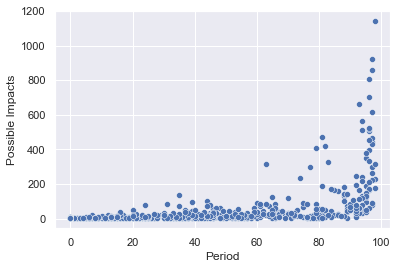

In [122]:
#plotting the possible impacts vs period
sb.scatterplot(impact_df['Period'], impact_df['Possible Impacts'])

c:\users\jaswinder singh\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Period', ylabel='Cumulative Palermo Scale'>

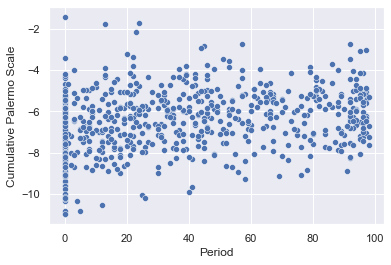

In [124]:
sb.scatterplot(impact_df['Period'], impact_df['Cumulative Palermo Scale'])

Asteroids with maximum diameter, maximum no of impacts and maximum cumulative impact probability

In [127]:
#Asteroid with maximum diameter
names_of_asteroids = impact_df['Object Name']
max_diameter = impact_df['Asteroid Diameter (km)'].max()

j = 0
for i in impact_df['Asteroid Diameter (km)']:
    if i == max_diameter:
        break
    j += 1

print(names_of_asteroids[j])
impact_df.loc[j]

2011 SR52


Object Name                      2011 SR52
Period Start                          2034
Period End                            2115
Possible Impacts                         4
Cumulative Impact Probability      7.6e-10
Asteroid Velocity                    13.55
Asteroid Magnitude                    15.6
Asteroid Diameter (km)               2.579
Cumulative Palermo Scale             -4.35
Maximum Palermo Scale                -4.59
Maximum Torino Scale                     0
Period                                  81
Name: 173, dtype: object

In [128]:
#Asteroid with maximum cumulative probability
max_probability = impact_df['Cumulative Impact Probability'].max()

j = 0
for i in impact_df['Cumulative Impact Probability']:
    if i == max_probability:
        break
    j += 1

print(names_of_asteroids[j])    
impact_df.loc[j]

2010 RF12


Object Name                      2010 RF12
Period Start                          2095
Period End                            2115
Possible Impacts                        52
Cumulative Impact Probability        0.065
Asteroid Velocity                      5.1
Asteroid Magnitude                    28.4
Asteroid Diameter (km)               0.007
Cumulative Palermo Scale              -3.2
Maximum Palermo Scale                 -3.2
Maximum Torino Scale                     0
Period                                  20
Name: 568, dtype: object

In [129]:
max_impact = impact_df['Possible Impacts'].max()

j = 0
for i in impact_df['Possible Impacts']:
    if i == max_impact:
        break
    j += 1

print(names_of_asteroids[j])    
impact_df.loc[j]

2008 EM68


Object Name                      2008 EM68
Period Start                          2017
Period End                            2115
Possible Impacts                      1144
Cumulative Impact Probability      1.3e-05
Asteroid Velocity                    14.54
Asteroid Magnitude                    27.8
Asteroid Diameter (km)                0.01
Cumulative Palermo Scale             -5.31
Maximum Palermo Scale                -5.65
Maximum Torino Scale                     0
Period                                  98
Name: 22, dtype: object

## Modelling and Predictions

In [188]:
#importing the necessary libraries
from sklearn.linear_model import SGDClassifier,SGDRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn import svm
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [139]:
impact_df.drop(['Object Name','Maximum Torino Scale','Asteroid Magnitude'], axis=1, inplace=True)
impact_df.drop(['Period End', 'Period Start','Maximum Palermo Scale'], axis=1, inplace=True)

In [178]:
impact_prediction = impact_df
y = impact_prediction['Possible Impacts'].values
X = impact_prediction
impact_prediction.head()

,Possible Impacts,Cumulative Impact Probability,Asteroid Velocity,Asteroid Diameter (km),Cumulative Palermo Scale,Period
0,1,5.200000e-09,17.77,0.007,-8.31,0
1,23,7.600000e-05,8.98,0.002,-6.60,29
2,30,1.600000e-05,18.33,0.002,-6.48,45
3,24,2.000000e-07,4.99,0.016,-6.83,59
4,85,2.300000e-08,19.46,0.497,-3.85,79


In [185]:
#Splitting the data into test and train using the inbuilt function in sklearn
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20)

In [142]:
#Scaling the data between -1 and 1
scaler = StandardScaler()
scaler.fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

Stochastic Gradient Descent

In [143]:
sdg = SGDRegressor()
sdg.fit(Xtrain, ytrain)
sgd = sdg.predict(Xtest)
print(sdg.score(Xtest, ytest))

0.9999999437256196


Random Forest

In [160]:
radm = RandomForestRegressor()
radm.fit(Xtrain, ytrain)
rmf = radm.predict(Xtest)
print(radm.score(Xtest, ytest))
explained_variance = print('The explained variance by the random forest is', metrics.explained_variance_score(dt_prediction,ytest))

0.9919862069763045
The explained variance by the random forest is 0.7851310429324921


Decision Tree

In [157]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(Xtrain, ytrain)
dt_prediction = decision_tree.predict(Xtest)
accuracy_dt = print('The accuracy of the Decision Tree is', metrics.accuracy_score(dt_prediction,ytest))

The accuracy of the Decision Tree is 0.781021897810219


XgBoost

In [148]:
xg_boost = XGBRegressor()
# Add silent=True to avoid printing out updates with each cycle
xg_boost.fit(Xtrain, ytrain, verbose=False)
xgb = xg_boost.predict(Xtest)
print(xg_boost.score(Xtest, ytest))

0.9857447738024354


Mean Absolute Percentage error for different models

In [186]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape
RF_MAPE = MAPE(ytest, rmf)
DT_MAPE = MAPE(ytest, dt_prediction)
XGB_MAPE = MAPE(ytest, xgb)
SGD_MAPE = MAPE(ytest, sgd)
print("Mean Absolute percentage error for random forest: ", RF_MAPE, "\n")
print("Mean Absolute percentage error for decision tree: ", DT_MAPE, "\n")
print("Mean Absolute percentage error for XGboost: ", XGB_MAPE, "\n")
print("Mean Absolute percentage error for Stochastic Gradient Descent: ", SGD_MAPE )

Mean Absolute percentage error for random forest:  2244.9052522393868 

Mean Absolute percentage error for decision tree:  2056.018197635912 

Mean Absolute percentage error for XGboost:  2192.5693439466895 

Mean Absolute percentage error for Stochastic Gradient Descent:  2344.8175146423655
